# Статистический анализ для определения выгодного тарифа

### Введение

Описание проекта и задачи:

Даны датасеты с данными 500 абонентов, каждый из них пользуется тарифом «Смарт» или «Ультра», условия тарифов также указаны в датасетах. Для телеком-компании требуется узнать, какой из тарифов для пользователей является оптимальным для увеличения прибыли. 

Мне нужно обработать данные и на основе выборки определить, какой из двух тарифов приносит компании больше денег.

### Обзор данных

In [ ]:
#Для начала импортирую библиотеки
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import math

Затем прочитаю файлы, сохраню их в переменные и сделаю обзор

In [ ]:
data_users = pd.read_csv('/datasets/users.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_calls = pd.read_csv('/datasets/calls.csv') 
data_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [ ]:
display(data_users, data_tariffs, data_calls, data_internet, data_messages)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [ ]:
data_users.info()
data_tariffs.info()
data_calls.info()
data_internet.info()
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null 

Мы видим датафрейм с личной информацией об абонентах, в трех других датафреймах указаны данные о их активности(звонки, сообщения, интернет-траффик), еще в одной таблице указаны подробности о тарифах. Представляется удобным то, что в таблицах содержатся столбцы с уникальными идентификаторами пользователей, в дальнейшем сделаю слияние данных из датафреймов.

### Подготовка данных

Проверю данные на наличие пропусков и дубликатов

In [ ]:
data_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [ ]:
data_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [ ]:
data_tariffs.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [ ]:
data_internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [ ]:
data_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [ ]:
data_users.duplicated().sum()

0

In [ ]:
data_tariffs.duplicated().sum()

0

In [ ]:
data_calls.duplicated().sum()

0

In [ ]:
data_internet.duplicated().sum()

0

In [ ]:
data_messages.duplicated().sum()

0

In [ ]:
pd.set_option('display.max_rows', 100)
display(data_users['city'].value_counts())

Москва              99
Санкт-Петербург     39
Новосибирск         16
Омск                14
Казань              14
Уфа                 12
Екатеринбург        11
Ульяновск           11
Краснодар           11
Набережные Челны    11
Челябинск            9
Самара               9
Волгоград            8
Пермь                8
Нижний Новгород      8
Красноярск           7
Улан-Удэ             7
Новокузнецк          7
Вологда              7
Ростов-на-Дону       6
Иркутск              6
Киров                6
Томск                6
Пенза                6
Воронеж              6
Тюмень               6
Сочи                 6
Махачкала            5
Магнитогорск         5
Балашиха             5
Владивосток          5
Ставрополь           5
Калуга               4
Астрахань            4
Тольятти             4
Новороссийск         4
Мурманск             4
Саранск              4
Чита                 4
Рязань               4
Петрозаводск         4
Кострома             4
Хабаровск            4
Курган     

Пропуски есть только в столбце с датой прекращения пользования тарифом, но это значит, что тариф ещё действовал на момент выгрузки данных.
Дубликатов, в том числе неявных, нет.

Для удобства использования в дальнейшем преобразую столбцы с датами в соответствующий формат. Также добавлю в таблицы дополнительный столбец для указания именно месяца, потому что именно по месяцам я буду считать показатели поведения пользователей. 
Из описания проекта я знаю, что данные потребления округляются большую сторону: секунды до минут, а мегабайты — до гигабайт. А общая сумма трафика считается только за месяц. Буду учитывать это и округлять значения.

In [ ]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

In [ ]:
data_users['reg_date_month'] = data_users['reg_date'].dt.month
data_calls['month'] = data_calls['call_date'].dt.month
data_internet['month'] = data_internet['session_date'].dt.month
data_messages['month'] = data_messages['message_date'].dt.month

In [ ]:
data_calls['duration'] = np.ceil(data_calls['duration'])

Теперь посчитаю несколько показателей для каждого пользователя:
1. количество сделанных звонков и израсходованных минут разговора по месяцам;
2. количество отправленных сообщений по месяцам;
3. объем израсходованного интернет-трафика по месяцам;
4. помесячную выручку с каждого пользователя.

In [ ]:
calls_pivot_count = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='count').reset_index().rename(columns={'duration':'calls_count_month'})
display(calls_pivot_count)

,user_id,month,calls_count_month
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58
...,...,...,...
3169,1498,10,41
3170,1499,9,9
3171,1499,10,68
3172,1499,11,74


In [ ]:
calls_pivot_sum = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index().rename(columns={'duration':'calls_sum_month'})
display(calls_pivot_sum)

,user_id,month,calls_sum_month
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0
...,...,...,...
3169,1498,10,247.0
3170,1499,9,70.0
3171,1499,10,449.0
3172,1499,11,612.0


На первой сводной таблице мы видим количество израсходованных минут разговора по месяцам, на второй - количество сделанных звонков. Также я добавил столбец с указанием среднего значения для каждого пользователя за год. В таблицах много пропусков, это связано с тем, что в таких месяцах абонент еще не был клиентом компании.


In [ ]:
messages_pivot = data_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index().rename(columns={'id':'msg_sum_month'})
display(messages_pivot)

,user_id,month,msg_sum_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Здесь указано количество отправленных сообщений каждого абонента по месяцам и соответствующее среднее количество за год.

Далее посчитаю для каждого пользователя трафик, переведу мегабайты в гигабайты и посчитаю их количество по месяцам. Как уже было указано, плата с абонентов взимается по гигабайтам и округляется в большую сторону даже при трафике в 1025мб.

In [ ]:
internet_pivot_gb= data_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index().rename(columns={'mb_used':'gb_sum_month'})
internet_pivot_gb['gb_sum_month'] = internet_pivot_gb['gb_sum_month'] / 1024
internet_pivot_gb['gb_sum_month'] = np.ceil(internet_pivot_gb['gb_sum_month'])
display(internet_pivot_gb)

,user_id,month,gb_sum_month
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
...,...,...,...
3198,1498,10,21.0
3199,1499,9,2.0
3200,1499,10,18.0
3201,1499,11,18.0


Теперь моя задача посчитать помесячную выручку с каждого пользователя, для этого для начала соединю в одну таблицу 3 таблицы с данными о сумме использованных абонентом минут, сообщений, гигабайт, затем добавлю в эту таблицу данные о тарифе для каждого  пользователя

In [ ]:
summary = calls_pivot_sum.merge(messages_pivot, on=['user_id', 'month'], how='outer')
summary = summary.merge(internet_pivot_gb, on=['user_id', 'month'], how='outer')
summary = summary.merge(data_users, on='user_id', how='outer')
data_tariffs = data_tariffs.rename(columns={'tariff_name':'tariff'})
summary = summary.merge(data_tariffs, on='tariff', how='outer')
summary['mb_per_month_included'] = summary['mb_per_month_included'] / 1024
summary = summary.rename(columns={'mb_per_month_included':'gb_per_month_included'})
summary = summary.sort_values(by=['user_id', 'month'])
summary = summary.reset_index(drop=True)

In [ ]:
summary[['calls_sum_month', 'msg_sum_month', 'gb_sum_month']] = summary[['calls_sum_month', 'msg_sum_month', 'gb_sum_month']].fillna(0)

Я получил таблицу, в которой указаны и данные о потреблении каждого пользователя по месяцам,и в то же время лимиты их тарифов. Теперь создам функцию, которая будет показывать, сколько каждый клиент платил каждый месяц сверх абонентской платы.

In [ ]:
def above_tariff(row):
    if row['calls_sum_month'] > row['minutes_included']:
        calls_above = (row['calls_sum_month'] - row['minutes_included']) * row['rub_per_minute']
    else:
        calls_above = 0
    if row['msg_sum_month'] > row['messages_included']:
        msg_above = (row['msg_sum_month'] - row['messages_included']) * row['rub_per_message']
    else:
        msg_above = 0
    if row['gb_sum_month'] > row['gb_per_month_included']:
        gb_above = (row['gb_sum_month'] - row['gb_per_month_included']) * row['rub_per_gb']
    else:
        gb_above = 0
    return calls_above + msg_above + gb_above

In [ ]:
summary['above_tariff_rub'] = summary.apply(above_tariff, axis=1)

In [ ]:
display(summary)

,user_id,month,calls_sum_month,msg_sum_month,gb_sum_month,age,churn_date,city,first_name,last_name,...,tariff,reg_date_month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_tariff_rub
0,1000,5.0,159.0,22.0,3.0,52,NaN,Краснодар,Рафаил,Верещагин,...,ultra,5,1000,30.0,3000,1950,150,1,1,0.0
1,1000,6.0,172.0,60.0,23.0,52,NaN,Краснодар,Рафаил,Верещагин,...,ultra,5,1000,30.0,3000,1950,150,1,1,0.0
2,1000,7.0,340.0,75.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,...,ultra,5,1000,30.0,3000,1950,150,1,1,0.0
3,1000,8.0,408.0,81.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,...,ultra,5,1000,30.0,3000,1950,150,1,1,0.0
4,1000,9.0,466.0,57.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,...,ultra,5,1000,30.0,3000,1950,150,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,10.0,247.0,42.0,21.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,...,smart,7,50,15.0,500,550,200,3,3,1200.0
3212,1499,9.0,70.0,11.0,2.0,35,NaN,Пермь,Гектор,Корнилов,...,smart,9,50,15.0,500,550,200,3,3,0.0
3213,1499,10.0,449.0,48.0,18.0,35,NaN,Пермь,Гектор,Корнилов,...,smart,9,50,15.0,500,550,200,3,3,600.0
3214,1499,11.0,612.0,59.0,18.0,35,NaN,Пермь,Гектор,Корнилов,...,smart,9,50,15.0,500,550,200,3,3,963.0


Теперь для подсчета выручки для каждого клиента прибавлю к сумме, оплаченной сверх тарифа, саму сумму абонентской платы в месяц.

In [ ]:
summary['paid'] = summary['above_tariff_rub'] + summary['rub_monthly_fee']

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
display(summary)

,user_id,month,calls_sum_month,msg_sum_month,gb_sum_month,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_date_month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_tariff_rub,paid
0,1000,5.0,159.0,22.0,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1,0.0,1950.0
1,1000,6.0,172.0,60.0,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1,0.0,1950.0
2,1000,7.0,340.0,75.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1,0.0,1950.0
3,1000,8.0,408.0,81.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1,0.0,1950.0
4,1000,9.0,466.0,57.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,10.0,247.0,42.0,21.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,50,15.0,500,550,200,3,3,1200.0,1750.0
3212,1499,9.0,70.0,11.0,2.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9,50,15.0,500,550,200,3,3,0.0,550.0
3213,1499,10.0,449.0,48.0,18.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9,50,15.0,500,550,200,3,3,600.0,1150.0
3214,1499,11.0,612.0,59.0,18.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9,50,15.0,500,550,200,3,3,963.0,1513.0


Таким образом мы получили данные о выручке по каждому пользователю за месяц.

### Анализ данных

Для анализа поведения абонентов, посчитаю среднее количество, дисперсию и стандартное отклонение по каждому тарифу

Сначал создам 2 среза по тарифу

In [ ]:
ultra = summary.query('tariff == "ultra"')

In [ ]:
smart = summary.query('tariff == "smart"')

Далее  перейду к показателям датафреймов

In [ ]:
smart[['calls_sum_month', 'msg_sum_month', 'gb_sum_month']].describe()

,calls_sum_month,msg_sum_month,gb_sum_month
count,2230.000000,2230.000000,2230.000000
mean,417.747534,33.369058,16.321525
std,190.476754,28.230396,5.756167
min,0.000000,0.000000,0.000000
25%,282.000000,10.000000,13.000000
50%,421.500000,28.000000,17.000000
75%,545.000000,51.000000,20.000000
max,1435.000000,143.000000,38.000000


In [ ]:
ultra[['calls_sum_month', 'msg_sum_month', 'gb_sum_month']].describe()

,calls_sum_month,msg_sum_month,gb_sum_month
count,986.000000,986.000000,986.000000
mean,526.089249,49.313387,19.474645
std,317.887549,47.806040,9.868057
min,0.000000,0.000000,0.000000
25%,282.500000,6.000000,12.000000
50%,518.000000,38.000000,19.000000
75%,751.750000,78.750000,27.000000
max,1673.000000,224.000000,49.000000


In [ ]:
np.var(smart[['calls_sum_month', 'msg_sum_month', 'gb_sum_month', 'paid']], ddof=1)

calls_sum_month     36281.393836
msg_sum_month         796.955256
gb_sum_month           33.133453
paid               669730.763895
dtype: float64

In [ ]:
np.var(ultra[['calls_sum_month', 'msg_sum_month', 'gb_sum_month', 'paid']], ddof=1)

calls_sum_month    101052.493549
msg_sum_month        2285.417425
gb_sum_month           97.378544
paid               141387.714809
dtype: float64

Пропусков в столбце с количеством сообщений больше всего, логично, что многие не так активно пользуются смсками. В среднем потребление клиентов на тарифе ultra выше, чем на smart. По числам мы видим, что значения по всем видам потребления распределены равномерно, это касается и показателей стандратного отклонения и значений экстремумов, но более наглядно мы увидим на гистограммах далее.
Но сначала посмотрю на показатели тарифов по выручке.

In [ ]:
smart[['paid']].describe()

,paid
count,2230.000000
mean,1289.641704
std,818.370799
min,550.000000
25%,550.000000
50%,1021.000000
75%,1750.000000
max,6770.000000


In [ ]:
ultra[['paid']].describe()

,paid
count,986.000000
mean,2070.030426
std,376.015578
min,1950.000000
25%,1950.000000
50%,1950.000000
75%,1950.000000
max,4800.000000


Средняя выручка значительно выше на тарифе ultra, медианное значение тоже. Но отметим, что в выборке клиентов на тарифе ultra меньше.

Text(0.5, 1.0, 'Ultra:минуты в месяц')

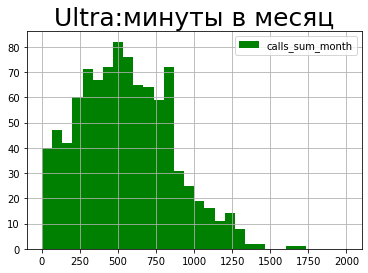

In [ ]:
ultra['calls_sum_month'].hist(bins=30,facecolor='g', range=(1,2000), legend=1)
plt.title('Ultra:минуты в месяц', fontsize=25)

Text(0.5, 1.0, 'Smart:минуты в месяц')

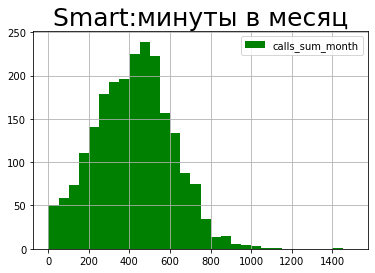

In [ ]:
smart['calls_sum_month'].hist(bins=30,facecolor='g', range=(1,1500), legend=1)
plt.title('Smart:минуты в месяц', fontsize=25)

Мы видим, что на тарифе smart распределение нормальное, на тарифе ultra тоже не распределение Пуассона, но менее ярко выделен пик на среднем значении. Дополнительные минуты берут около 20% клиентов. На тарифе ultra никто из выборки не вышел за тарифный лимит в 3000 минут. 

Text(0.5, 1.0, 'Ultra:смс в месяц')

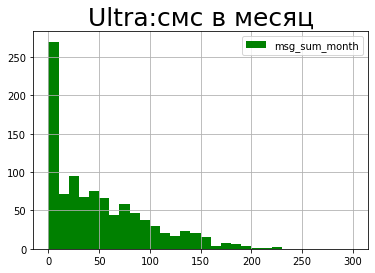

In [ ]:
ultra['msg_sum_month'].hist(bins=30,facecolor='g', range=(0,300), legend=1)
plt.title('Ultra:смс в месяц', fontsize=25)

Text(0.5, 1.0, 'Smart:смс в месяц')

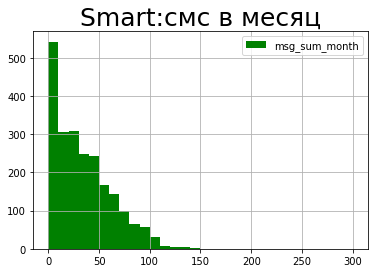

In [ ]:
smart['msg_sum_month'].hist(bins=30,facecolor='g', range=(0,300), legend=1)
plt.title('Smart:смс в месяц', fontsize=25)

По смскам на графике видим распределение Пуассона, на тарифе ultra в среднем пишут больше смс.

Text(0.5, 1.0, 'Ultra:гб в месяц')

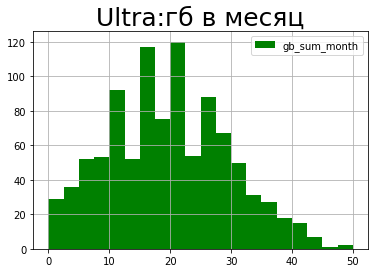

In [ ]:
ultra['gb_sum_month'].hist(bins=20,facecolor='g', range=(0,50), legend=1)
plt.title('Ultra:гб в месяц', fontsize=25)

Text(0.5, 1.0, 'Smart:гб в месяц')

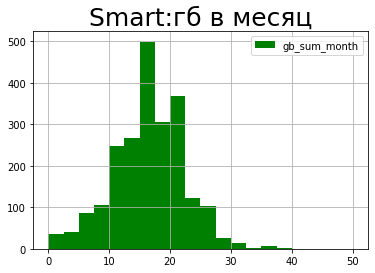

In [ ]:
smart['gb_sum_month'].hist(bins=20,facecolor='g', range=(0,50), legend=1)
plt.title('Smart:гб в месяц', fontsize=25)

На графиках количества гб видим нормальные распределения, можно отметить пиковое значение на тарифе smart, именно там лимит тарифа

Text(0.5, 1.0, 'Ultra:выручка в месяц')

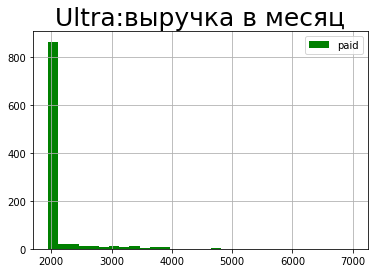

In [ ]:
ultra['paid'].hist(bins=30,facecolor='g', range=(1950,7000), legend=1)
plt.title('Ultra:выручка в месяц', fontsize=25)

Text(0.5, 1.0, 'Smart:выручка в месяц')

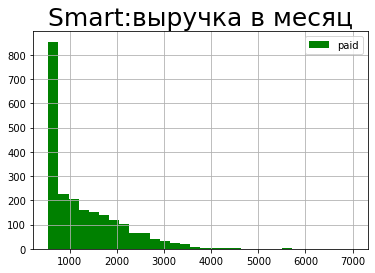

In [ ]:
smart['paid'].hist(bins=30,facecolor='g', range=(550,7000), legend=1)
plt.title('Smart:выручка в месяц', fontsize=25)

Мы видим что в основном выручка приходит из суммы абоненской платы, но если абонентам ultra в основном хватает лимитов, на тарифе smart клиенты чаще тратят больше денег сверх тарифа.

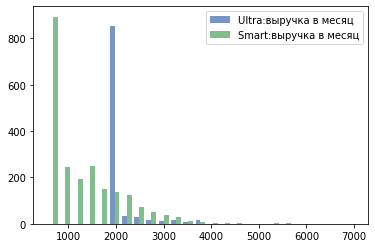

In [ ]:
plt.style.use('seaborn-deep')

x = ultra['paid']
y = smart['paid']
bins = 25

plt.hist([x, y], bins, range=(550,7000), alpha=0.75, label=['Ultra:выручка в месяц', 'Smart:выручка в месяц'])
plt.legend(loc='upper right')
plt.show()

### Проверка гипотез

Проверю 2 гипотезы о выручке:

#### Гипотеза - Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Нулевой гипотезой считаю "Cредняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт»". Альтернативная гипотеза - "Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются".
Мы уже определили, что средняя выручка с клиентов разных тарифов сильно различается, но расчеты мы делали на основании выборок, а не генеральной совокупности.
Нам нужно проверить гипотезу о равенстве среднего по взятым выборкам. Для этого использую метод scipy.stats.ttest_ind, параметр equal_var укажу как False, потому что ранее я определил, что дисперсии выборок отличаются, и сам размер выборок не одинаков. Критический уровень статистической значимости укажу как 5%.

In [ ]:
alpha = .05
results = st.ttest_ind(ultra['paid'], smart['paid'], equal_var = False)
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.927011394420941e-250
Отвергаем нулевую гипотезу


Pvalue значение очень мало, поэтому мы отвергаем нулевую гипотезу о том, выручка по тарифам равна, и наоборот не отвергаем гипотезу, что выручка отличается.

#### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевой гипотезой считаю "Cредняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов. Альтернативная гипотеза - "Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".
Сформирую 2 датафрейма, клиенты из Москвы и из других регионов. Проблема в том, что там будут представлены клиенты обоих тарифов, а, как мы узнали выше, выручка по ним скорее всего сильно отличается.
Выделю группы, посмотрю дисперсию и количество клиентов на разных тарифах в разных выборках, затем проверю гипотезу с помощью метода st.ttest_ind.

In [ ]:
moscow_clients = summary.query('city == "Москва"')
regions_clients = summary.query('city != "Москва"')

In [ ]:
moscow_clients.pivot_table(index = 'tariff', values = 'paid', aggfunc = ['count', 'mean'])

,count,mean
,paid,paid
tariff,,
smart,386,1239.357513
ultra,225,2074.000000


In [ ]:
np.var(moscow_clients['paid'], ddof=1)

565636.467011886

In [ ]:
regions_clients.pivot_table(index = 'tariff', values = 'paid', aggfunc = ['count', 'mean'])

,count,mean
,paid,paid
tariff,,
smart,1844,1300.167570
ultra,761,2068.856767


In [ ]:
np.var(regions_clients['paid'], ddof=1)

654069.574962777

Доля тарифа smart в регионах выше, но соотношение все равно позволяет сравнить 2 выборки. Дисперсии отличаются не сильно, но численности выборки отличаются значительно, поэтому решил снова использовать equal_var = False.

In [ ]:
alpha = .05
results = st.ttest_ind(moscow_clients['paid'],regions_clients['paid'], equal_var = False)
print(results.pvalue)
if alpha > results.pvalue:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5216952110000278
Не получилось отвергнуть нулевую гипотезу


Pvalue больше установленной мной статистической значимости, значит на основе данных выборок мы не можем отвергнуть гипотезу о том, что выручка с клиентов из Москвы равна выручке с клиентов из регионов.

### Общий вывод

Я провел предобработку данных, соединил имеющиеся таблицы с данными, провел исследовательский анализ, выявил основные значения потребления по каждому пользователю и проверил гипотезы о выручке.

Итак, отвечая на главный вопрос исследования, на основе выборки установлено, что больше выручки телеком-компания получает с клиентов на тарифе "Ультра", при этом основная выручка идет именно из абоненсткой платы, которая значительно выше, чем на тарифе "Смарт", абоненты которого, тем не менее, значительно больше тратят денег сверх их абоненской платы, покупая дополнительные гигабайты, звонки, сообщения. Вывод о выручке подтверждается и проверкой гипотезы статистическим тестом, мы определили, что вероятность того, что средние показатели выручек двух тарифов будут равны, очень мала, хотя у нас есть только выборка, а не генеральная совокупность. 

Сообщения не пользуются популярностью, тем временем на интернет многим пользователям не хватает даже лимита в 30 гб тарифа "Смарт". Но в целом расход клиентами тарифов минут, гб и сообщений схож, и не соответвует разнице в абоненской плате (почти в 4 раза), тариф "Ультра" для компании выгоден.

Могу в виде предложения отметить, что возможно целесообразно было бы ввести новый "средний тариф", возможно психологически клиенты тарифа "Смарт" посчитают примемлемым платить абоненскую плату в 850-900 рублей, но не тратить дополнительные деньги на увеличение лимитов. Например, мы увидели, что многие тратят гигабайты очень близко к лимиту в 15 гб, и их потребности выше, они думают на этом моменте, стоит ли покупать дополнительные гб сверхтарифа. Главное, чтобы это не привело к оттоку с тарифа "Ультра".

Несмотря на бОльшую долю тарифа "Ультра" в Москве по сравнению с регионами, выручка для команий в регионах и Москве в целом не сильно отличается.